In [1]:
import pandas as pd
from math import sqrt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from matplotlib import pyplot as plt
from sklearn import metrics

In [2]:
# read the data
preprocessed_data = pd.read_pickle('../data/preprocessed_twitter_qualitative.pd')

# Create a dataframe
df = pd.DataFrame(preprocessed_data)
y = df['score'].copy()
df.drop('score', axis=1, inplace=True) 

In [3]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [4]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

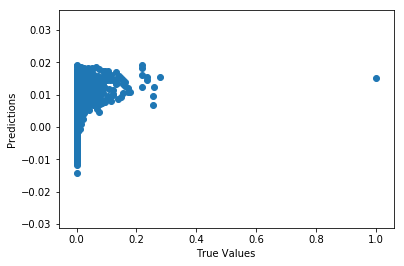

[ -7.85732609e-06   3.73888527e-03   4.22668306e-01   1.77191767e-05
  -1.44293880e-06  -3.87719559e-02   7.97563492e-03   1.01177728e+00
   6.61198547e-02   1.28899019e-05  -3.15442334e-06   2.14577197e-05
   6.43344368e-06  -1.63030531e-02  -5.83037398e-04  -2.51864595e-02
   3.71717134e-03   1.02637855e+00   8.85096524e-02   3.35616170e-02
   8.79979021e-03   4.42100635e+00  -5.82855201e+00  -7.24593038e-04
  -6.00682349e-06  -4.95220401e-05  -3.41759818e-07   2.45515277e-06
  -1.06134962e-06   2.28997880e-06]


In [5]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print(lm.coef_)

In [6]:
scores = cross_val_score(model, df, y, cv=4)
print("Cross-validated scores:", scores)

Cross-validated scores: [-1.02488843  0.03570243  0.05659625  0.02585229]


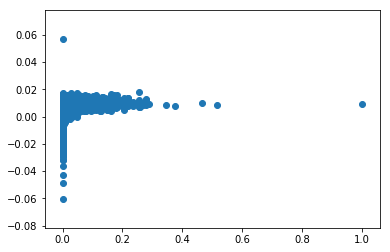

In [7]:
predictions = cross_val_predict(model, df, y, cv=4)
plt.scatter(y, predictions)
plt.show()

In [8]:
print(y.shape)
print(predictions.shape)
accuracy = metrics.r2_score(y, predictions)
print("R2Score:", accuracy)
rmse = sqrt(metrics.mean_squared_error(y,  predictions))
print("RMSE:", rmse)

(23350,)
(23350,)
R2Score: 0.0401627246307
RMSE: 0.018861421837102724


In [9]:
print(lm.coef_)

[ -7.85732609e-06   3.73888527e-03   4.22668306e-01   1.77191767e-05
  -1.44293880e-06  -3.87719559e-02   7.97563492e-03   1.01177728e+00
   6.61198547e-02   1.28899019e-05  -3.15442334e-06   2.14577197e-05
   6.43344368e-06  -1.63030531e-02  -5.83037398e-04  -2.51864595e-02
   3.71717134e-03   1.02637855e+00   8.85096524e-02   3.35616170e-02
   8.79979021e-03   4.42100635e+00  -5.82855201e+00  -7.24593038e-04
  -6.00682349e-06  -4.95220401e-05  -3.41759818e-07   2.45515277e-06
  -1.06134962e-06   2.28997880e-06]
